In [13]:
%%capture

# Install the required packages
!pip install gensim scikit-learn matplotlib numpy

We are now loading a pre-trained model containing word-embeddings. This might take some time (~1 minute)

In [15]:
import gensim.downloader as api

model = api.load("word2vec-google-news-300")

This model is trained on a large dataset of news articles. Each word is represented by a vector. It is trying to  capture whether words appear in similar contexts or not. For instance, in the sentence "My favorite drink is [BLANK] juice", one might expect words such as "apple", "orange" or "pineapple". Since these words often appear in similar contexts, we want their vectors, the *embeddings*, to be similar as well. For other words that would not appear in the same context, such as "jumping", "car" or "Germany", we want the embeddings to be different. A simple way to check how similar to words are, is by looking at their cosine similarity.

In [33]:
def print_similarity(word1, word2):
    print(f"Similarity between {word1 : ^10} and {word2 : ^10}: {model.similarity(word1, word2):.2f}")

print_similarity("apple", "orange")
print_similarity("apple", "pineapple")
print_similarity("apple", "jumping")
print_similarity("apple", "car")
print_similarity("apple", "germany")

Similarity between   apple    and   orange  : 0.39
Similarity between   apple    and pineapple : 0.48
Similarity between   apple    and  jumping  : 0.00
Similarity between   apple    and    car    : 0.13
Similarity between   apple    and  germany  : 0.15


Since all words are just represented by vectors, we can also add or subtract them (and even multiply). Even though the model is very simple, it seems to have captured some understanding of language and abstract concepts.

Let's start by the famous example:

*king* - *man* + *woman* = ?

In [34]:
model.most_similar(positive=["king", "woman"], negative=["man"], topn=3)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951)]

While this might seem trivial (and in the age of LLMs, it really is), this was all the hype in 2014. Play around and see if you can find any other funny examples!

In [39]:
positive_words = []     # ["king", "woman", ..]
negative_words = []     # ["man", ...]
n_words = 3

model.most_similar(positive=positive_words, negative=negative_words, topn=n_words)

In [114]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def plot_words(words):
    X = [model[word] for word in words]
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    result = StandardScaler().fit_transform(result)
    plt.quiver([0] * len(words), [0] * len(words), result[:, 0], result[:, 1], angles='xy', scale_units='xy', scale=1, color='r')
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.title("Word Embeddings (projected to 2D)")
    plt.show()

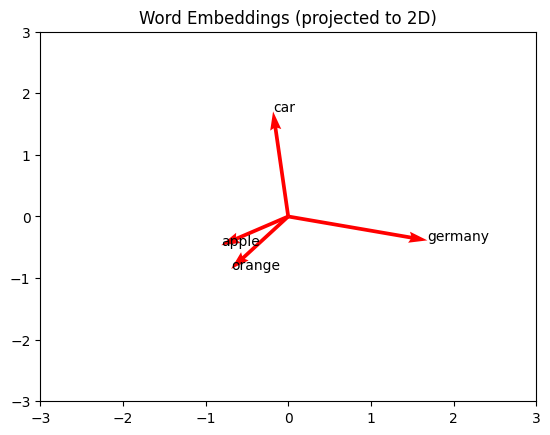

In [115]:
plot_words(["apple", "orange", "car", "germany"])

We used [plt.quiver(X, Y, U, V)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html) to plot our vectors. Here, (X, Y) is the starting location and (U, V) is the direction of our vector. Are you able to plot the vector *king* - *man* + *woman* and the *queen* vector?

[ 1.07629088 -1.25423376  1.02943195  0.60453031]


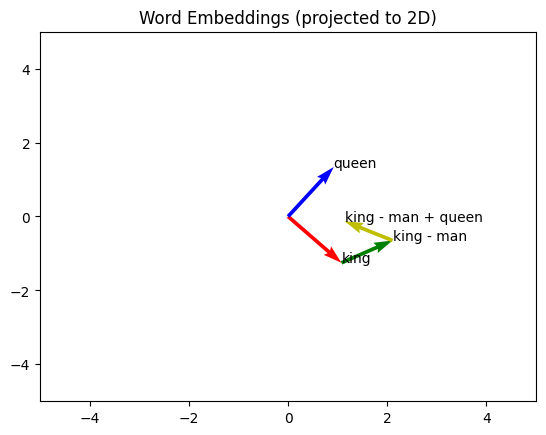

In [169]:
import numpy as np

words = ["king", "queen", "man", "woman"]
X = [model[word] for word in words]
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
result = pca.fit_transform(X)
result = StandardScaler().fit_transform(result)

ORIGO = np.array([0, 0])
KING, QUEEN, MAN, WOMAN = result

# Plot from origo to king
ORIGO_TO_KING = np.concatenate([ORIGO, KING])
plt.quiver(*ORIGO_TO_KING, angles='xy', scale_units='xy', scale=1, color='r')

# Plot from origo to queen
ORIGO_TO_QUEEN = np.concatenate([ORIGO, QUEEN])
plt.quiver(0, 0, result[1, 0], result[1, 1], angles='xy', scale_units='xy', scale=1, color='b')

# Plot from king to king - man
KING_TO_NEG_MAN = np.concatenate([KING, -MAN])
print(KING_TO_NEG_MAN)
neg_man = -1 * MAN
plt.quiver(*KING_TO_NEG_MAN, angles='xy', scale_units='xy', scale=1, color='g')

# Plot from king - man to king - man + woman
KING_TO_NEG_MAN_POS_WOMAN = np.concatenate([KING-MAN, WOMAN])
plt.quiver(*KING_TO_NEG_MAN_POS_WOMAN, angles='xy', scale_units='xy', scale=1, color='y')

plt.annotate("king", xy=(result[0, 0], result[0, 1]))
plt.annotate("queen", xy=(result[1, 0], result[1, 1]))
plt.annotate("king - man", xy=KING-MAN)
plt.annotate("king - man + queen", xy=KING-MAN+WOMAN)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title("Word Embeddings (projected to 2D)")
plt.show()